In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get update

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graph

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark


In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [ ]:
print (os.listdir('./sample_data'))


['README.md', 'anscombe.json', 'mnist_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv', 'california_housing_test.csv']


In [ ]:
file_loc = '/content/drive/My Drive/BigData_Project/aadhar.csv'


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sparkContext.getConf().getAll()


[('spark.driver.host', '23716fb3171a'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.driver.port', '43181'),
 ('spark.app.id', 'local-1620302871993'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.name', 'pyspark-shell')]

In [ ]:
df = spark.read.csv(file_loc, inferSchema=True, header =True)


In [ ]:
print (type(df))


<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
df.printSchema()


root
 |-- Registrar: string (nullable = true)
 |-- Enrolment Agency: string (nullable = true)
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Sub District: string (nullable = true)
 |-- Pin Code: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Aadhaar generated: integer (nullable = true)
 |-- Enrolment Rejected: integer (nullable = true)
 |-- Residents providing email: integer (nullable = true)
 |-- Residents providing mobile number: integer (nullable = true)



In [ ]:
df.show()


+--------------------+--------------------+-------------+----------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|           Registrar|    Enrolment Agency|        State|  District|Sub District|Pin Code|Gender|Age|Aadhaar generated|Enrolment Rejected|Residents providing email|Residents providing mobile number|
+--------------------+--------------------+-------------+----------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|      Allahabad Bank|A-Onerealtors Pvt...|Uttar Pradesh| Allahabad|        Meja|  212303|     F|  7|                1|                 0|                        0|                                1|
|      Allahabad Bank|Asha Security Gua...|Uttar Pradesh| Sonbhadra| Robertsganj|  231213|     M|  8|                1|                 0|                        0|                                0|
|    

In [ ]:
#df.createOrReplaceTempView()

In [ ]:
import pyspark.sql.functions as F

In [ ]:
df.show()

+--------------------+--------------------+-------------+----------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|           Registrar|    Enrolment Agency|        State|  District|Sub District|Pin Code|Gender|Age|Aadhaar generated|Enrolment Rejected|Residents providing email|Residents providing mobile number|
+--------------------+--------------------+-------------+----------+------------+--------+------+---+-----------------+------------------+-------------------------+---------------------------------+
|      Allahabad Bank|A-Onerealtors Pvt...|Uttar Pradesh| Allahabad|        Meja|  212303|     F|  7|                1|                 0|                        0|                                1|
|      Allahabad Bank|Asha Security Gua...|Uttar Pradesh| Sonbhadra| Robertsganj|  231213|     M|  8|                1|                 0|                        0|                                0|
|    

In [ ]:
df.groupBy(["State"]).sum("Aadhaar generated").show(5)


+----------+----------------------+
|     State|sum(Aadhaar generated)|
+----------+----------------------+
|  Nagaland|                   545|
| Karnataka|                 19764|
|    Odisha|                 18182|
|    Kerala|                 15143|
|Tamil Nadu|                 32485|
+----------+----------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["State"]).sum("Enrolment Rejected").show(5)


+----------+-----------------------+
|     State|sum(Enrolment Rejected)|
+----------+-----------------------+
|  Nagaland|                     43|
| Karnataka|                   1445|
|    Odisha|                   1596|
|    Kerala|                    538|
|Tamil Nadu|                   1193|
+----------+-----------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["Enrolment Agency"]).sum("Enrolment Rejected").show(5)

+--------------------+-----------------------+
|    Enrolment Agency|sum(Enrolment Rejected)|
+--------------------+-----------------------+
|Raj Construction Co.|                     21|
|      CO JOMLO MOBUK|                     13|
|NPS Technologies ...|                    613|
|    APOnline Limited|                     22|
|         DC Serchhip|                      3|
+--------------------+-----------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["Enrolment Agency"]).sum("Aadhaar generated").show(5)


+--------------------+----------------------+
|    Enrolment Agency|sum(Aadhaar generated)|
+--------------------+----------------------+
|Raj Construction Co.|                   532|
|      CO JOMLO MOBUK|                     8|
|NPS Technologies ...|                  9692|
|    APOnline Limited|                   305|
|         DC Serchhip|                  1067|
+--------------------+----------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["State"]).mean("Age").show(5)



+----------+------------------+
|     State|          avg(Age)|
+----------+------------------+
|  Nagaland|27.410714285714285|
| Karnataka|  17.5915582354808|
|    Odisha|20.469595723354495|
|    Kerala| 27.02924543544999|
|Tamil Nadu| 22.59313077939234|
+----------+------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["State"]).sum("Residents providing mobile number").show(5)


+----------+--------------------------------------+
|     State|sum(Residents providing mobile number)|
+----------+--------------------------------------+
|  Nagaland|                                   579|
| Karnataka|                                 18336|
|    Odisha|                                 10290|
|    Kerala|                                 14023|
|Tamil Nadu|                                 29813|
+----------+--------------------------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["State"]).sum("Residents providing email").show(5)


+----------+------------------------------+
|     State|sum(Residents providing email)|
+----------+------------------------------+
|  Nagaland|                             6|
| Karnataka|                          1111|
|    Odisha|                           708|
|    Kerala|                          1161|
|Tamil Nadu|                          1034|
+----------+------------------------------+
only showing top 5 rows



In [ ]:
df.groupBy(["Gender"]).count().show(5)


+------+------+
|Gender| count|
+------+------+
|     F|148013|
|     T|     7|
|     M|292798|
+------+------+



In [ ]:
df.groupBy("state","Gender").count().show(30)
    ## EXTRA

+--------------------+------+-----+
|               state|Gender|count|
+--------------------+------+-----+
|             Manipur|     M|  375|
|Andaman and Nicob...|     F|    5|
|      Madhya Pradesh|     F|12747|
|              Odisha|     M| 6830|
|           Rajasthan|     M|19523|
|         Uttarakhand|     F| 1741|
|              Punjab|     F| 1934|
|             Tripura|     M|  594|
|             Mizoram|     F| 1291|
|           Rajasthan|     F| 9135|
|              Others|     F|    7|
|           Karnataka|     M| 9932|
|         Lakshadweep|     M|    4|
|Dadra and Nagar H...|     F|   44|
|       Daman and Diu|     F|   19|
|              Odisha|     T|    1|
|               Assam|     M| 2670|
|      Madhya Pradesh|     T|    2|
|               Delhi|     F| 2649|
|            Nagaland|     F|   91|
|             Mizoram|     M| 1881|
|                 Goa|     F|  208|
|           Karnataka|     F| 5822|
|                 Goa|     M|  591|
|            Nagaland|     M

In [ ]:
df_pandas = df.toPandas()

In [ ]:
df_pandas

,Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,F,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,M,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,F,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,M,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,M,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440813,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,Patan,822123,M,1,3,0,0,1
440814,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,Patan,822123,M,2,1,0,0,1
440815,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,Patan,822123,M,3,3,0,0,1
440816,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,Patan,822123,M,4,1,0,0,0


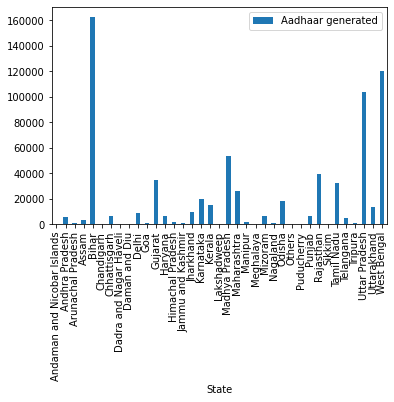

In [ ]:
gk = df_pandas[["State","Aadhaar generated"]].groupby(['State']).agg("sum")
gk.plot(kind='bar')

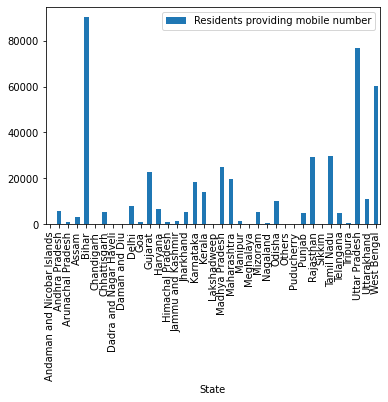

In [ ]:
gk = df_pandas[["State","Residents providing mobile number"]].groupby(['State']).agg("sum")
gk.plot(kind='bar')

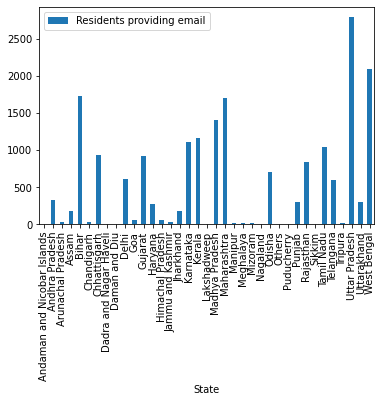

In [ ]:
gk = df_pandas[["State","Residents providing email"]].groupby(['State']).agg("sum")
gk.plot(kind='bar')

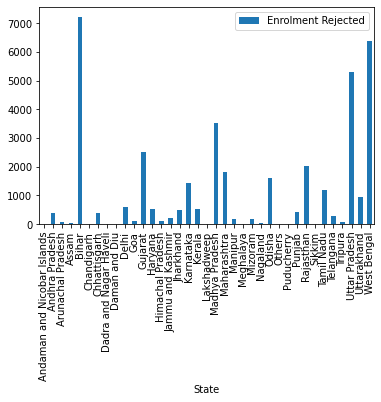

In [ ]:
gk = df_pandas[["State","Enrolment Rejected"]].groupby(['State']).agg("sum")
gk.plot(kind='bar')

In [ ]:
gk = df_pandas[["Gender"]].groupby(['Gender']).agg(['count'])
gk.plot(kind='bar')

NameError: ignored

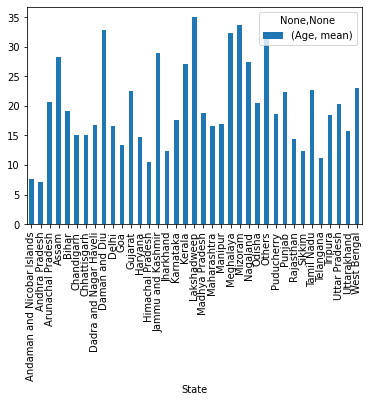

In [ ]:
gk = df_pandas[["State","Age"]].groupby(['State']).agg(["mean"])
gk.plot(kind='bar')